# Metrics

If we talk about classification problems, the most common metrics used are:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply
AUC (AUC)
- Log loss
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)

When we have an equal number of positive and negative samples in a binary
classification metric, we generally use accuracy, precision, recall and f1.

## Accuracy

It is one of the most straightforward metrics used in machine learning.
It defines how accurate your model is.

In [1]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1
    
    # return accuracy
    # which is correct predictions over the number of samples
    return correct_counter / len(y_true)

### sklearn accuracy

In [2]:
from sklearn import metrics

true_y  = [0,1,1,1,0,0,0,1]
pred_y = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(true_y, pred_y)

0.625

Let's say we have 90% negative and 10% positive targets. It's a skewed dataset, So, we split the data using stratified k-fold technique.<br> Now, we have 90% negatives and 10% positives in validation set.

we got 90% accuracy. You might think it is performing well. But it's not

The number of samples in one class out numbered the number of samples in other class. So, calculating how many test samples are correctly predicted, will be no use. It'll be like,  wrongly predicted (False positives) negative samples are thrown in 10% error. 

There is no use of that type of model

In these kinds of cases, it is not advisable to use accuracy as an evaluation metric as it is not representative of the data.

In these cases, it’s better to look at other metrics such as **precision**

## Precision

**True positive (TP):** Given an image, if your model predicts the sample is positive target, and the actual target for that sample is positive target, it is considered a true positive.<br>
**True negative (TN):** Given an image, if your model predicts that the sample is negative target and the sample is negative target, it is considered a true negative.

**False positive (FP):** Given an image, if your model predicts positive and the actual target for that sample is negatice, it a false positive.<br>
**False negative (FN):** Given an image, if your model predicts negative and the actual target for that sample is positive, it is a false negative.

** $ Precision = TP / (TP + FP) $ **

Let's say, model predictions for skewed data is 
" accurate negative predictions are 80 out of 90 and accurate positive predictions are 8 out of 10"

Accuracy will be 88%

Let's calculate precision for this problem:<br>
- TP : 8
- TN: 80
- FP: 10
- FN: 2

$ precision = 8 / (8 + 10)  = 0.444$

This means our model is correct 44.4% times when it’s trying to identify positive samples

In [3]:
def true_positives(y_pred, y_true):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp
def true_negatives(y_pred, y_true):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn
def false_positives(y_pred, y_true):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp
def false_negatives(y_pred, y_true):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [4]:
def accuracy_v2(y_pred, y_true):
    true = true_positives(y_pred, y_true) + true_negatives(y_pred, y_true)
    all_ = true_positives(y_pred, y_true) + true_negatives(y_pred, y_true) + false_negatives(y_pred, y_true) + false_positives(y_pred, y_true)
    return true/all_

In [5]:
accuracy_v2(true_y, pred_y)

0.625

In [6]:
def precision(y_true, y_pred):
    tp = true_positives(y_pred, y_true)
    fp = false_positives(y_pred, y_true)
    return  tp / (fp + tp)

In [7]:
precision(true_y, pred_y)

0.6666666666666666

### Recall or True Positive Rate or sensitivity.

$ Recall = TP / (TP + FN) $

In the above case recall is 8 / (8 + 2) = 0.80. This means our model identified 80% of positive samples correctly.

In [8]:
def recall(y_true, y_pred):
    fn = false_negatives(y_pred, y_true)
    tp = true_positives(y_pred, y_true)
    
    return tp / (tp + fn)

In [9]:
recall(true_y, pred_y)

0.5

For a “good” model, our **precision and recall** values should be high.

Our model produces quite a lot of false positives but less false negatives.

Most of the models predict a probability, and when we predict, we usually choose this threshold to be 0.5. This threshold is not always ideal, and depending on this threshold, your value of precision and recall can change drastically.

In [10]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,
                    0.0490937, 0.0191491, 0.17554844,
                    0.15952202, 0.03819563, 0.11639273,
                    0.079377, 0.08584789, 0.39095342,
                    0.27259048, 0.03447096, 0.04644807,
                    0.03543574, 0.18521942, 0.05934905,
                    0.61977213, 0.33056815]

Let's try out multiple threshold values

In [11]:
precisions, recalls = [], []
thresholds = [0.0490937 , 0.05934905, 0.079377,
                0.08584789, 0.11114267, 0.11639273,
                0.15952202, 0.17554844, 0.18521942,
                0.27259048, 0.31620708, 0.33056815,
                0.39095342, 0.61977213]
for i in thresholds:
    pred_labels = [1 if x>=i else 0 for x in y_pred]
    precision_score = precision(y_true, pred_labels)
    recall_score = recall(y_true, pred_labels)
    
    precisions.append(precision_score)
    recalls.append(recall_score)

Text(0, 0.5, 'precision')

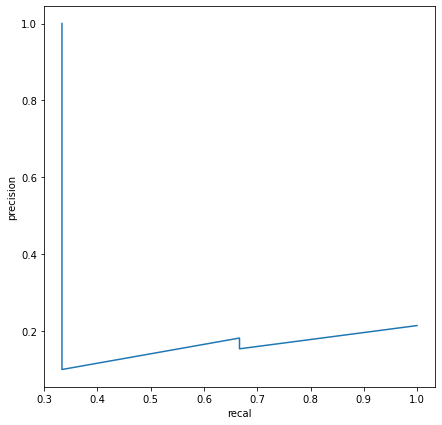

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.plot(recalls, precisions)
plt.xlabel("recal")
plt.ylabel("precision")

it’s challenging to choose a value of threshold that gives both good precision and recall values. If the threshold is too high, you have a smaller number of true positives and a high number of false negatives. This decreases your
recall; however, your precision score will be high. If you reduce the threshold too low, false positives will increase a lot, and precision will be less.

## F1 score

F1 score is a metric that combines both precision and recall. It is defined as a simple weighted average (harmonic mean) of precision and recall.

<center> $F1 = 2PR / (P + R)$ where P - precision    R - Recall</center>
<center> $F1 = 2TP / (2TP + FP + FN)$</center>

In [13]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r)
    return score

In [14]:
f1(true_y, pred_y)

0.5714285714285715

### sklearn.f1_score

In [15]:
metrics.f1_score(true_y, pred_y)

0.5714285714285715

### False Positive Rate

$FPR = FP / (TN + FP)$

In [16]:
def fpr(y_true, y_pred):
    fp = false_positives(y_pred, y_true)
    tn = true_negatives(y_pred, y_true)
    return fp / (tn + fp)

In [17]:
fpr(true_y, pred_y)

0.25

And 1 - FPR is known as specificity or True Negative Rate or TNR.

In [18]:
tpr_values = []
fpr_values = []
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

In [19]:
for thr_ in thresholds:
    pred_labels = [1 if x>=thr_ else 0 for x in y_pred]
    tpr_score = recall(y_true, pred_labels)
    fpr_score = fpr(y_true, pred_labels)
    
    tpr_values.append(tpr_score)
    fpr_values.append(fpr_score)

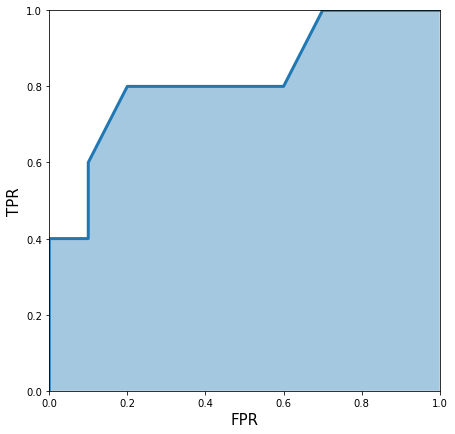

In [20]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_values, tpr_values, alpha=0.4)
plt.plot(fpr_values, tpr_values, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

This curve is also known as the **Receiver Operating Characteristic (ROC)** or **Area Under ROC Curve** or **Area Under Curve or just simply AUC.**

ROC is used very often when you have a dataset which has skewed binary targets

### sklearn roc_auc_score

In [21]:
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

## Log loss

<center>$Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )$</center>

Where target is either 0 or 1 and prediction is a probability of a sample belonging
to class 1.

In [22]:
import numpy as np
def log_loss(y_tue, y_pred):
    epsilon = 1e-15
    loss = []    
    for yt, yp in zip(y_true, y_pred):
        y = np.clip(yp, epsilon, 1-epsilon)
        single_loss = -1.0 * (yt * np.log(yp) + (1-yt) * np.log(1-yp))
        loss.append(single_loss)
    return np.mean(loss)

In [23]:
log_loss(y_true, y_pred)

0.49882711861432294

### sklearn log loss

In [24]:
metrics.log_loss(y_true, y_pred)

0.49882711861432294

log loss penalizes a lot more than other metrics

if the model is sure that sample is 51% sure about belonging to class 1, true class is 1<br>
loss in this case will be 0.67<br>
and if the model is sure that sample is 49% sure about belonging to class 0, true, class is 0<br>
loss in this case will be 0.67

above mentioned all metrics will be used for multiclass classification also by calculating multiple times

In [25]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
print(metrics.precision_score(y_true, y_pred, average="macro"))
print(metrics.precision_score(y_true, y_pred, average="micro"))
print(metrics.precision_score(y_true, y_pred, average="weighted"))

0.3611111111111111
0.4444444444444444
0.39814814814814814


**macro**<br>
calculate precision for all classes and then take average<br>
**micro**<br>
calculate all the true positives and false positives for every class and then calculate precision<br>
**weighted**
- calculate precision for a class
- multiply precision with count of samples in class (weighted precision for class)
- summ all the weighted precisions and divide it by number of samples

## recall or f1 score for multiclass

In [26]:
metrics.f1_score(y_true, y_pred, average="weighted")

0.41269841269841273

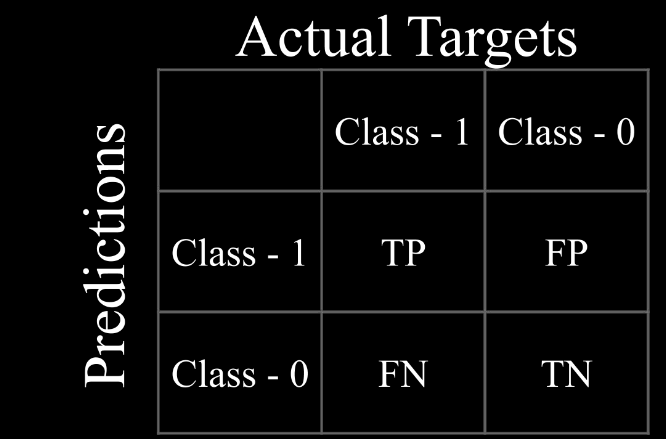
<center>Confusion matrix</center>

In [27]:
cm = metrics.confusion_matrix(y_true, y_pred)

Text(0.5, 48.5, 'Predicted Labels')

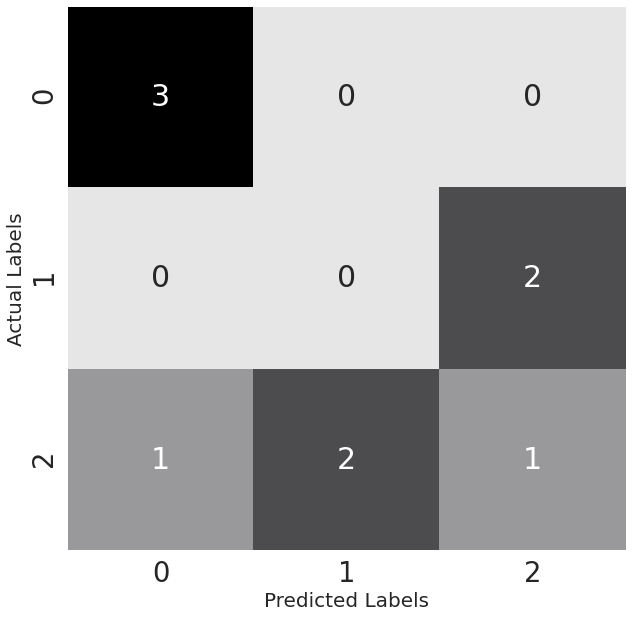

In [28]:
import seaborn as sns
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

## Multilabel classification

In multilabel classification, we need to do prediction for multiple classes

For example, we want to get objects present in a picture like chair, pot, fan etc.., (all these are considered as labels)

The metrics for this type of classification problem are a bit different. Some suitable
and most common metrics are:
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)
- Log loss